# Bandit Problem

In [14]:
# imports
import numpy as np
import matplotlib.pyplot as plt
class Bandit:
    def __init__(self, mean=0, stddev=1):
        self.__mean = mean
        self.__stddev = stddev

    '''This method simulates pulling the lever of the bandit and returns the reward'''
    def pullLever(self):
        return np.random.normal(self.__mean, self.__stddev)

import random
# Include your imports here, if any are used. 

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [15]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)] 


To generate reward from that bandit, use the pullLever() command

In [ ]:
bandits[0].pullLever()


0.04364432528747145

: 

: 

: 

: 

## Greedy algorithm Implementation

In [24]:

def run_greedy(bandits,T):
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    Q = np.zeros(10)
    N = np.zeros(10)
    reward_history = []

    # initialization
    for i in range(10):
        r = bandits[i].pullLever()
        Q[i] = r
        N[i] = 1
        reward_history.append(r)

    for _ in range(1000):
        gred = Q.argmax()
        r = bandits[gred].pullLever()

        N[gred] += 1
        Q[gred] += (r - Q[gred]) / N[gred]

        reward_history.append(r)

    return reward_history


Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

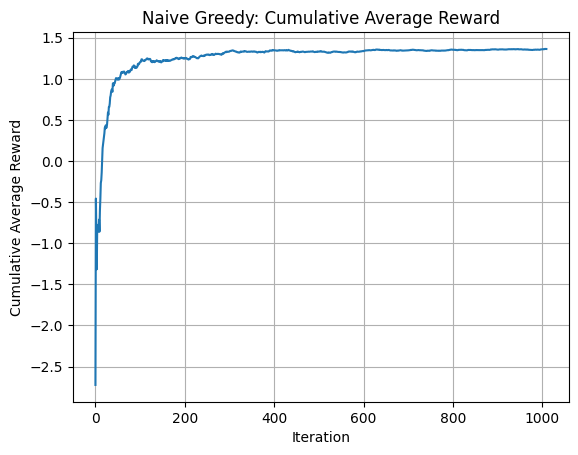

In [17]:
reward_history = run_greedy()
reward_history = np.array(reward_history)
cumulative_avg = np.cumsum(reward_history) / np.arange(1, len(reward_history) + 1)
plt.figure()
plt.plot(cumulative_avg)
plt.xlabel("Iteration")
plt.ylabel("Cumulative Average Reward")
plt.title("Naive Greedy: Cumulative Average Reward")
plt.grid(True)
plt.show()


## $\epsilon$-greedy Algorithm

In [25]:
def run_epsilon_greedy(bandits,epsilon, T = 1000):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    Q = np.zeros(10)
    N = np.zeros(10)
    reward_history = []
    for i in range(10):
        r = bandits[i].pullLever()
        Q[i] = r
        N[i] = 1
    
    for _ in range(T):
        coin = np.random.rand()
        if(coin<epsilon):
        #expllore
            gred = np.random.randint(10)
            
            r = bandits[gred].pullLever()

            N[gred] += 1
            Q[gred] += (r - Q[gred]) / N[gred]
            reward_history.append(r)

        else:
            #greedy 
            gred = Q.argmax()
            r = bandits[gred].pullLever()

            N[gred] += 1
            Q[gred] += (r - Q[gred]) / N[gred]
            reward_history.append(r)

    return reward_history

    pass


Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

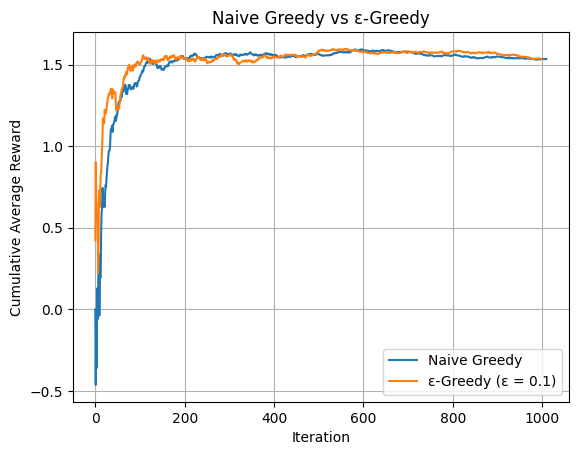

In [ ]:
bandits = [Bandit(random.random()*4 - 2) for _ in range(10)]
greedy_rewards = run_greedy(bandits, T=1000)
eps_rewards = run_epsilon_greedy(bandits, epsilon=0.1, T=1000)

greedy_rewards = np.array(greedy_rewards)
eps_rewards = np.array(eps_rewards)

greedy_avg = np.cumsum(greedy_rewards) / np.arange(1, len(greedy_rewards) + 1)
eps_avg = np.cumsum(eps_rewards) / np.arange(1, len(eps_rewards) + 1)

plt.figure()

plt.plot(greedy_avg, label="Naive Greedy")
plt.plot(eps_avg, label="ε-Greedy (ε = 0.1)")

plt.xlabel("Iteration")
plt.ylabel("Cumulative Average Reward")
plt.title("Naive Greedy vs ε-Greedy")
plt.legend()
plt.grid(True)

plt.show()


## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

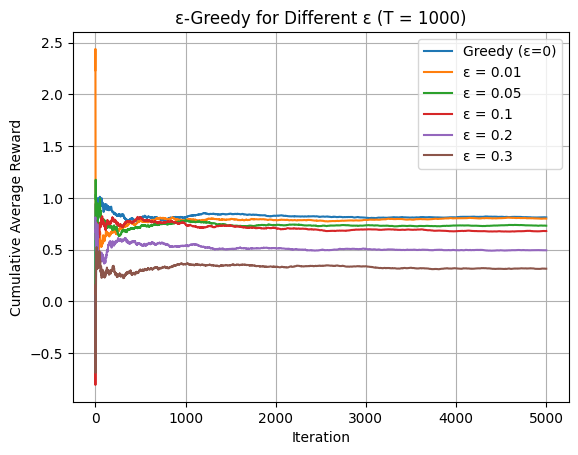

In [86]:
bandits = [Bandit(random.random()*4 - 2) for _ in range(10)]
eps_rewards = run_epsilon_greedy(bandits, epsilon=0.1, T=1000)

T = 5000
results = {}
epsilons = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3]

for eps in epsilons:
    rewards = run_epsilon_greedy(bandits, epsilon=eps, T=T)
    rewards = np.array(rewards)

    cumulative_avg = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
    results[eps] = cumulative_avg

plt.figure()

for eps, curve in results.items():
    label = "Greedy (ε=0)" if eps == 0 else f"ε = {eps}"
    plt.plot(curve, label=label)

plt.xlabel("Iteration")
plt.ylabel("Cumulative Average Reward")
plt.title("ε-Greedy for Different ε (T = 1000)")
plt.legend()
plt.grid(True)
plt.show()

## Optimistic Initial Values

In [61]:
def run_optimistic_greedy(bandits, Q_init=5.0, T=1000):
    # TODO: Implement the optimistic greedy algorithm here

    # Return the reward from the bandits in a list
    k = len(bandits)
    Q = np.ones(k) * Q_init
    N = np.zeros(k)
    reward_history = []

    for _ in range(T):
        a = Q.argmax()
        r = bandits[a].pullLever()

        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        reward_history.append(r)

    return reward_history
    pass

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

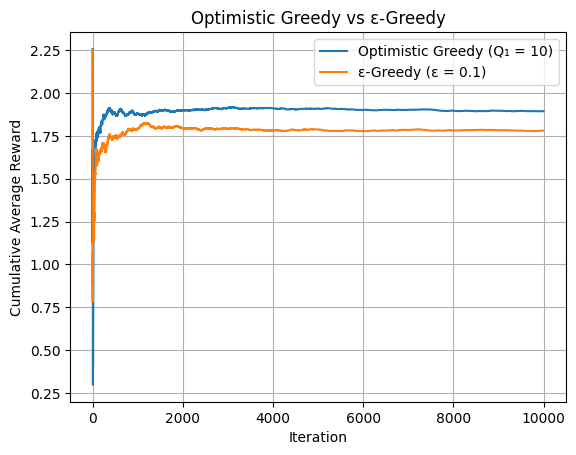

In [85]:


bandits = [Bandit(random.random()*4 - 2) for _ in range(10)]

T = 10000

opt_rewards = run_optimistic_greedy(bandits, Q_init=10, T=T)
eps_rewards = run_epsilon_greedy(bandits, epsilon=0.1, T=T)

opt_rewards = np.array(opt_rewards)
eps_rewards = np.array(eps_rewards)

opt_avg = np.cumsum(opt_rewards) / np.arange(1, len(opt_rewards) + 1)
eps_avg = np.cumsum(eps_rewards) / np.arange(1, len(eps_rewards) + 1)



plt.figure()
plt.plot(opt_avg, label="Optimistic Greedy (Q₁ = 10)")
plt.plot(eps_avg, label="ε-Greedy (ε = 0.1)")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Average Reward")
plt.title("Optimistic Greedy vs ε-Greedy")
plt.legend()
plt.grid(True)
plt.show()


## Upper Confidence Bound (UCB)

In [68]:
def run_ucb(c,T=1000):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    k = len(bandits)
    Q = np.zeros(k)
    N = np.zeros(k)
    reward_history = []

    for i in range(k):
        r = bandits[i].pullLever()
        Q[i] = r
        N[i] = 1
        reward_history.append(r)
        
    for t in range(k+1,T+1):
        ucb_values = Q + np.sqrt(2 * np.log(t) / N)
        a = np.argmax(ucb_values)

        r = bandits[a].pullLever()
        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]
        reward_history.append(r)

    return reward_history
    pass

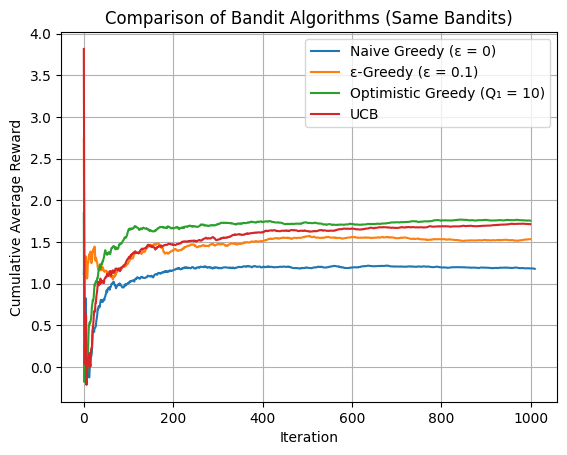

In [99]:
#visiualising all the algo for same bandits 


bandits = [Bandit(random.random()*4 - 2) for _ in range(10)]
T = 1000
greedy_rewards = run_greedy(bandits, T)
eps_rewards = run_epsilon_greedy(bandits, epsilon=0.1, T=T)
opt_rewards = run_optimistic_greedy(bandits, Q_init=10, T=T)
ucb_rewards = run_ucb(bandits, T=T)

def cumulative_average(rewards):
    rewards = np.array(rewards)
    return np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

greedy_avg = cumulative_average(greedy_rewards)
eps_avg = cumulative_average(eps_rewards)
opt_avg = cumulative_average(opt_rewards)
ucb_avg = cumulative_average(ucb_rewards)

plt.figure()

plt.plot(greedy_avg, label="Naive Greedy (ε = 0)")
plt.plot(eps_avg, label="ε-Greedy (ε = 0.1)")
plt.plot(opt_avg, label="Optimistic Greedy (Q₁ = 10)")
plt.plot(ucb_avg, label="UCB")

plt.xlabel("Iteration")
plt.ylabel("Cumulative Average Reward")
plt.title("Comparison of Bandit Algorithms (Same Bandits)")
plt.legend()
plt.grid(True)
plt.show()

